DB Index: 0.7963338823953641
Silhouette Score: 0.40056367083667616
Calinski-Harabasz Index: 272.9726703044745


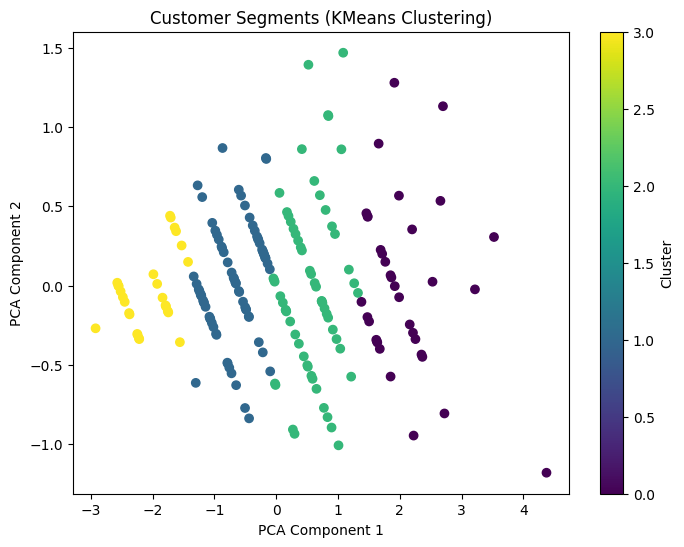

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transaction data with customer profiles
customer_profile = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    purchase_count=('TransactionID', 'count')
).reset_index()

# Merge customer profiles with original customer data
customers = pd.merge(customers, customer_profile, on='CustomerID', how='left')

# Handle missing values
customers['total_spent'] = customers['total_spent'].fillna(0)
customers['purchase_count'] = customers['purchase_count'].fillna(0)


# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers[['total_spent', 'purchase_count']])

# Apply KMeans clustering (choose k between 2 and 10, here k=4 for example)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
customers['Cluster'] = clusters

# Calculate DB Index, Silhouette Score, and Calinski-Harabasz Index
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)
calinski_harabasz_avg = calinski_harabasz_score(scaled_features, clusters)

# Print the clustering metrics
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")

# PCA for visualization (2D plot)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plotting clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments (KMeans Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Save the clustering result
customers[['CustomerID', 'Cluster']].to_csv('Customer_Segments.csv', index=False)
